# Homework 9  Assignment 3

Prepared by eb3237

## Instructions:

# Table of Contents
 <p><div class="lev1 toc-item"><a href="#DATA:" data-toc-modified-id="DATA:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DATA:</a></div><div class="lev1 toc-item"><a href="#exploration" data-toc-modified-id="exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>exploration</a></div><div class="lev2 toc-item"><a href="#plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)" data-toc-modified-id="plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-civilian-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-civilian-fire-arms-per-person-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>plot the average number of civilian fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-homicide-by-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-homicide-by-fire-arms-per-person-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>plot the average number of homicide by fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev1 toc-item"><a href="#Modeling" data-toc-modified-id="Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling</a></div><div class="lev2 toc-item"><a href="#fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person." data-toc-modified-id="fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person.-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person.</a></div><div class="lev2 toc-item"><a href="#Outlier-removal:" data-toc-modified-id="Outlier-removal:-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Outlier removal:</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them" data-toc-modified-id="Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Extra credit: calculate the confidence interval by hand and also plot them</a></div><div class="lev2 toc-item"><a href="#Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot." data-toc-modified-id="Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot.-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Use the stsatsmodels.gaphics package to plot the influence plot.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences" data-toc-modified-id="Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences-35"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences</a></div><div class="lev2 toc-item"><a href="#Discuss-your-findings" data-toc-modified-id="Discuss-your-findings-36"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Discuss your findings</a></div>

**regression exercise**

**written by Federica B Bianco CUSP 2017**

**for PUI lecture on models and linear regression**

**investigate linear relationships between fire arm possession, homicides by fire arms, and mass shootings for different countries, considering also the country GDP**

# DATA: 

The Guardian firearms murders and ownership data. The relevans sheet is uploaded in the github repository as a csv file. Download it from there. Note: this dataset is from 2012.

**Extra credit**: download directly from google docs with a google API

https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/edit#gid=0

Number of mass shootings: find the link here https://datawrapper.dwcdn.net/pvLFI/4/

The world population by country find the download link here :
https://data.worldbank.org/indicator/SP.POP.TOTL

Remember that all read or downloads have to me reproducible.

Merge all datasets. After throwing away the irrelevant data it should look something like this (I renamed the GDP and the population as gdp" and "pop")

Throughout, when I ask you to include errors in plots or models, use Poisson statistics: the error is the square root of the number you are considering (e.g. this country has N fire arms +/- square root of N, or this country has Np [= N/population +/- (square root of N) / population] fire arms per person).

In [2]:
from __future__ import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import scipy.stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from numpy import inf

%pylab inline
try:
    import urllib2 as urllib
except ImportError:
    import urllib.request as urllib
import requests
import io
import os
import zipfile

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
PUIDATA = os.getenv("PUIDATA")
print (PUIDATA)

/nfshome/eb3237/PUIdata


In [4]:
#Guardian firearms murders and ownership data.
!wget https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/HW9_fb55/World%20firearms%20murders%20and%20ownership%20-%20Sheet%201.csv


--2018-11-13 16:13:13--  https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/HW9_fb55/World%20firearms%20murders%20and%20ownership%20-%20Sheet%201.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.200.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.200.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7852 (7.7K) [text/plain]
Saving to: ‘World firearms murders and ownership - Sheet 1.csv.4’

World firearms murd 100%[===================>]   7.67K  --.-KB/s    in 0s      

2018-11-13 16:13:13 (134 MB/s) - ‘World firearms murders and ownership - Sheet 1.csv.4’ saved [7852/7852]



In [6]:
#move data to $PUIDATA, and read data 
cmd = "World firearms murders and ownership - Sheet 1.csv" + os.getenv("PUIDATA")
df_1 = pd.read_csv(os.getenv("PUIDATA") + "/World firearms murders and ownership - Sheet 1.csv")
df_1.head()

,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms
0,Albania,AL,CTS,65.9,56.0,1.76,70.0,8.6,270000.0
1,Algeria,DZ,CTS,4.8,20.0,0.06,78.0,7.6,1900000.0
2,Angola,AO,NaN,NaN,NaN,NaN,34.0,17.3,2800000.0
3,Anguilla,AI,WHO-MDB,24.0,1.0,7.14,NaN,NaN,NaN
4,Argentina,AR,Ministry of Justice,52.0,1198.0,3.02,62.0,10.2,3950000.0


In [7]:
df_1.dtypes

Country/Territory                            object
ISO code                                     object
Source                                       object
% of homicides by firearm                   float64
Number of homicides by firearm              float64
Homicide by firearm rate per 100,000 pop    float64
Rank by rate of ownership                   float64
Average firearms per 100 people             float64
Average total all civilian firearms         float64
dtype: object

In [8]:
#Number of mass shootings 
#had to manually download to my directory the data from the link 
#https://datawrapper.dwcdn.net/pvLFI/4/

df_2 = pd.read_csv('data-pvLFI.csv')
df_2.head()

,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013)
0,Australia,15.0,4
1,Austria,30.4,1
2,Belgium,17.2,2
3,Canada,30.8,4
4,Denmark,12.0,0


In [9]:
df_2.dtypes

Country                                  object
Guns per 100 inhabitants                float64
Number of mass shootings (1983-2013)      int64
dtype: object

In [66]:
#The world population by country 
!wget http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=csv  
       

--2018-11-13 15:40:32--  http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=csv
Resolving api.worldbank.org (api.worldbank.org)... 52.202.62.36
Connecting to api.worldbank.org (api.worldbank.org)|52.202.62.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79717 (78K) [application/zip]
Saving to: ‘SP.POP.TOTL?downloadformat=csv.2’

SP.POP.TOTL?downloa 100%[===================>]  77.85K  --.-KB/s    in 0.02s   

2018-11-13 15:40:32 (4.23 MB/s) - ‘SP.POP.TOTL?downloadformat=csv.2’ saved [79717/79717]



In [10]:
#instead using pd.excel function to read the file directly from the link

df_3 = pd.read_excel('http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=excel', sheetname = 0, header = 3)
df_3.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0


In [11]:
df_3.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
1961              float64
1962              float64
1963              float64
1964              float64
1965              float64
1966              float64
1967              float64
1968              float64
1969              float64
1970              float64
1971              float64
1972              float64
1973              float64
1974              float64
1975              float64
1976              float64
1977              float64
1978              float64
1979              float64
1980              float64
1981              float64
1982              float64
1983              float64
1984              float64
1985              float64
                   ...   
1988              float64
1989              float64
1990              float64
1991              float64
1992              float64
1993              float64
1994              float64
1995        

In [12]:
#GDP data
#directly from the link using pd.excel function
df_4 = pd.read_excel("http://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=excel", 
                      sheetname = 0, header = 3)
df_4.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,8.417804e+10,7.549239e+10,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.007353e+09,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09


In [13]:
df_4.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
1961              float64
1962              float64
1963              float64
1964              float64
1965              float64
1966              float64
1967              float64
1968              float64
1969              float64
1970              float64
1971              float64
1972              float64
1973              float64
1974              float64
1975              float64
1976              float64
1977              float64
1978              float64
1979              float64
1980              float64
1981              float64
1982              float64
1983              float64
1984              float64
1985              float64
                   ...   
1988              float64
1989              float64
1990              float64
1991              float64
1992              float64
1993              float64
1994              float64
1995        

In [14]:
#merging datasets
df = df_2.merge(df_3[["Country Name", "2012"]], how='inner', left_on = "Country", right_on = "Country Name")
df

,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013),Country Name,2012
0,Australia,15.0,4,Australia,22742475.0
1,Austria,30.4,1,Austria,8429991.0
2,Belgium,17.2,2,Belgium,11128246.0
3,Canada,30.8,4,Canada,34750545.0
4,Denmark,12.0,0,Denmark,5591572.0
5,Finland,45.3,2,Finland,5413971.0
6,France,31.2,6,France,65659789.0
7,Germany,30.3,7,Germany,80425823.0
8,Greece,22.5,0,Greece,11045011.0
9,Hungary,5.5,0,Hungary,9920362.0


In [15]:
df = df.merge(df_1[["Country/Territory", "Average total all civilian firearms", "Number of homicides by firearm"]], 
              how='inner', left_on = "Country", right_on = "Country/Territory")
df

,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013),Country Name,2012,Country/Territory,Average total all civilian firearms,Number of homicides by firearm
0,Australia,15.0,4,Australia,22742475.0,Australia,3050000.0,30.0
1,Austria,30.4,1,Austria,8429991.0,Austria,2500000.0,18.0
2,Belgium,17.2,2,Belgium,11128246.0,Belgium,1800000.0,70.0
3,Canada,30.8,4,Canada,34750545.0,Canada,9950000.0,173.0
4,Denmark,12.0,0,Denmark,5591572.0,Denmark,650000.0,15.0
5,Finland,45.3,2,Finland,5413971.0,Finland,2400000.0,24.0
6,France,31.2,6,France,65659789.0,France,19000000.0,35.0
7,Germany,30.3,7,Germany,80425823.0,Germany,25000000.0,158.0
8,Greece,22.5,0,Greece,11045011.0,Greece,2500000.0,29.0
9,Hungary,5.5,0,Hungary,9920362.0,Hungary,560000.0,7.0


In [16]:
df = df.merge(df_4[["Country Name", "2012"]], how='inner', left_on = "Country", right_on = "Country Name")
df

,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013),Country Name_x,2012_x,Country/Territory,Average total all civilian firearms,Number of homicides by firearm,Country Name_y,2012_y
0,Australia,15.0,4,Australia,22742475.0,Australia,3050000.0,30.0,Australia,1.543411e+12
1,Austria,30.4,1,Austria,8429991.0,Austria,2500000.0,18.0,Austria,4.094252e+11
2,Belgium,17.2,2,Belgium,11128246.0,Belgium,1800000.0,70.0,Belgium,4.978842e+11
3,Canada,30.8,4,Canada,34750545.0,Canada,9950000.0,173.0,Canada,1.824289e+12
4,Denmark,12.0,0,Denmark,5591572.0,Denmark,650000.0,15.0,Denmark,3.271489e+11
5,Finland,45.3,2,Finland,5413971.0,Finland,2400000.0,24.0,Finland,2.567065e+11
6,France,31.2,6,France,65659789.0,France,19000000.0,35.0,France,2.683825e+12
7,Germany,30.3,7,Germany,80425823.0,Germany,25000000.0,158.0,Germany,3.543984e+12
8,Greece,22.5,0,Greece,11045011.0,Greece,2500000.0,29.0,Greece,2.456707e+11
9,Hungary,5.5,0,Hungary,9920362.0,Hungary,560000.0,7.0,Hungary,1.278566e+11


In [17]:
df.columns

Index(['Country', 'Guns per 100 inhabitants',
       'Number of mass shootings (1983-2013)', 'Country Name_x', '2012_x',
       'Country/Territory', 'Average total all civilian firearms',
       'Number of homicides by firearm', 'Country Name_y', '2012_y'],
      dtype='object')

In [37]:
#final dataset for exploration similar to the example provided by the prof.
df_fin = df.drop(['Country Name_x', 'Country Name_y', 'Country/Territory'], axis = 1)
df_fin.head()

,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013),2012_x,Average total all civilian firearms,Number of homicides by firearm,2012_y
0,Australia,15.0,4,22742475.0,3050000.0,30.0,1.543411e+12
1,Austria,30.4,1,8429991.0,2500000.0,18.0,4.094252e+11
2,Belgium,17.2,2,11128246.0,1800000.0,70.0,4.978842e+11
3,Canada,30.8,4,34750545.0,9950000.0,173.0,1.824289e+12
4,Denmark,12.0,0,5591572.0,650000.0,15.0,3.271489e+11


In [38]:
df_fin.columns = ["Country", "Guns per 100 inhabitants", "Number of mass shootings", "pop", "Average total all civilian firearms", "Number of homicides by firearm",  "gdp"]
df_fin

,Country,Guns per 100 inhabitants,Number of mass shootings,pop,Average total all civilian firearms,Number of homicides by firearm,gdp
0,Australia,15.0,4,22742475.0,3050000.0,30.0,1.543411e+12
1,Austria,30.4,1,8429991.0,2500000.0,18.0,4.094252e+11
2,Belgium,17.2,2,11128246.0,1800000.0,70.0,4.978842e+11
3,Canada,30.8,4,34750545.0,9950000.0,173.0,1.824289e+12
4,Denmark,12.0,0,5591572.0,650000.0,15.0,3.271489e+11
5,Finland,45.3,2,5413971.0,2400000.0,24.0,2.567065e+11
6,France,31.2,6,65659789.0,19000000.0,35.0,2.683825e+12
7,Germany,30.3,7,80425823.0,25000000.0,158.0,3.543984e+12
8,Greece,22.5,0,11045011.0,2500000.0,29.0,2.456707e+11
9,Hungary,5.5,0,9920362.0,560000.0,7.0,1.278566e+11


# exploration

## 1. plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)

Use Poisson statistics for the errorbars on the number of mass shootings (optional: include errors on the population, also as Poisson statistics)

Are there any points that look like they may be outilers?


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


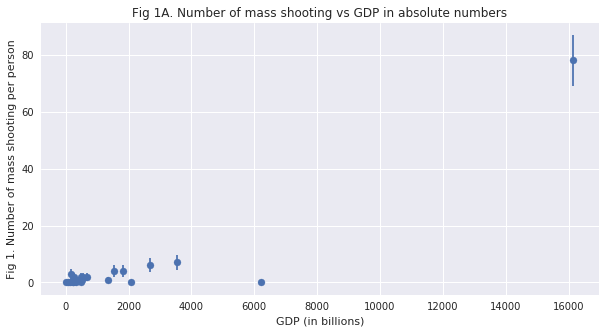

Number of mass shooting vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of mass shootings


In [39]:
#plot Mass shooting vs GDP
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_fin.gdp / 1e9, df_fin['Number of mass shootings'])
ax.errorbar(df_fin.gdp / 1e9, df_fin['Number of mass shootings'], 
            yerr = np.sqrt(df_fin['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shooting per person")
ax.set_ylim()

ax.set_title('Fig 1A. Number of mass shooting vs GDP in absolute numbers')
pl.show()
print ("Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest number of mass shootings")


There are definitely the points that look like outilers.  The datapoint on the top right corner of the plot is the outlier (USA) with the largest GDP and number of shootings.

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


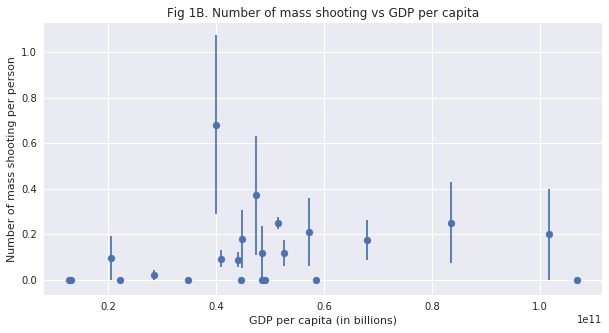

In [40]:
# plot mass shooting vs gdp per person, show the errorbars (y errors)

fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_fin['gdp'] / df_fin['pop']*1e6, df_fin['Number of mass shootings']/ df_fin['pop']*1e6)
ax.errorbar(df_fin['gdp'] / df_fin['pop']*1e6, df_fin['Number of mass shootings'] / df_fin['pop']*1e6, 
           yerr = np.sqrt(df_fin['Number of mass shootings']) / df_fin['pop'] * 1e6, fmt = '.')
ax.set_xlabel("GDP per capita (in billions)")
ax.set_ylabel("Number of mass shooting per person")
ax.set_ylim()
ax.set_title('Fig 1B. Number of mass shooting vs GDP per capita')
pl.show()

USA is again an outlier, which has the largest number of mass shootings per person.
 The data is spread around the mean as the error bars are large.

## 2. plot the average number of civilian fire arms per person
first without errors, then with errors. are there  points that look like outliers?

In [45]:
#the average number of civilian fire arms per person
df_fin['firearms_pp'] = df_fin["Average total all civilian firearms"] / df_fin['pop'] 
df_fin.head()

,Country,Guns per 100 inhabitants,Number of mass shootings,pop,Average total all civilian firearms,Number of homicides by firearm,gdp,firearms_pp
0,Australia,15.0,4,22742475.0,3050000.0,30.0,1.543411e+12,0.134110
1,Austria,30.4,1,8429991.0,2500000.0,18.0,4.094252e+11,0.296560
2,Belgium,17.2,2,11128246.0,1800000.0,70.0,4.978842e+11,0.161751
3,Canada,30.8,4,34750545.0,9950000.0,173.0,1.824289e+12,0.286326
4,Denmark,12.0,0,5591572.0,650000.0,15.0,3.271489e+11,0.116246


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


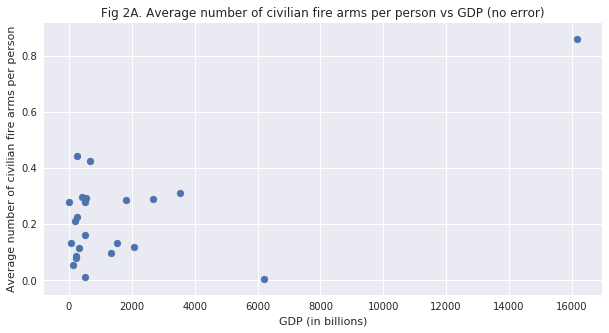

In [46]:
#plotting without errors - scatterplot
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_fin.gdp / 1e9, df_fin['firearms_pp'])
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Average number of civilian fire arms per person")
ax.set_ylim()
ax.set_title('Fig 2A. Average number of civilian fire arms per person vs GDP (no error)')
pl.show()

Text(0.5,1,'Fig 2B. Histogram of Average nnumber of civilian fire arms per person (no error)')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


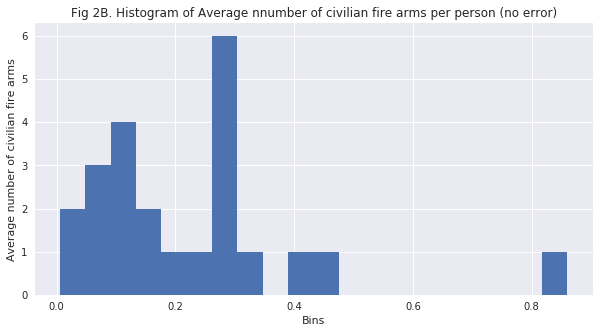

In [47]:
#plotting without errors - histogram

fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

x = np.arange(len(df_fin))
bar = ax.hist(df_fin.firearms_pp, bins=20);
ax.set_ylabel("Average number of civilian fire arms");
ax.set_xlabel("Bins");
ax.set_title("Fig 2B. Histogram of Average nnumber of civilian fire arms per person (no error)")


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


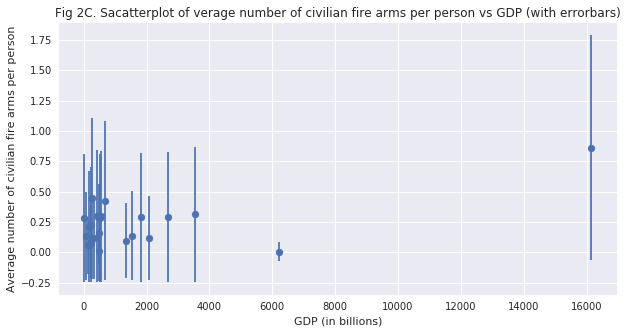

In [51]:
#plotting with errorbars - scatterplot
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_fin.gdp / 1e9, df_fin['firearms_pp'])
ax.errorbar(df_fin.gdp / 1e9, df_fin['firearms_pp'], 
            yerr = np.sqrt(df_fin['firearms_pp'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Average number of civilian fire arms per person")
ax.set_ylim()
ax.set_title('Fig 2C. Sacatterplot of verage number of civilian fire arms per person vs GDP (with errorbars)')
pl.show()

USA is the outlier again. other countries have low civilian firearms rate. 

## 3. plot the average number of homicide by fire arms per person
first as a histogram

then against the country GDP, with statistical errors. are there  points that look like outliers?

Text(0.5,1,'Fig 3A. Histogram of Average number of Homicides by Firearm per person')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


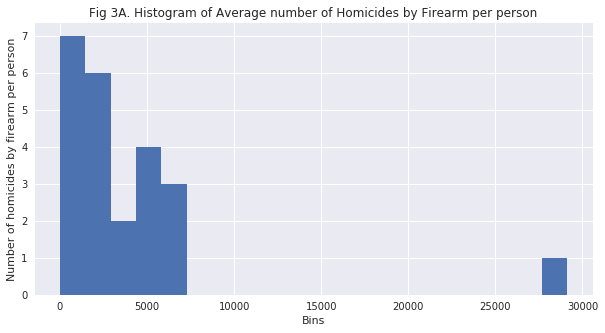

In [58]:
#plot first as a histogram
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

x = np.arange(len(df))
bar = ax.hist(df_fin['Number of homicides by firearm'] / df_fin['pop'], bins=20);
ax.set_ylabel("Number of homicides by firearm per person");
ax.set_xlabel("Bins");
ax.set_title("Fig 3A. Histogram of Average number of Homicides by Firearm per person")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


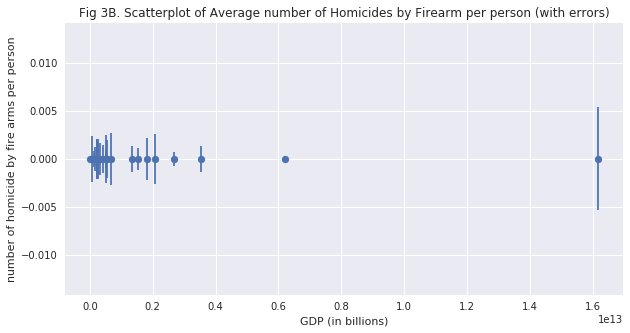

Number of homicides by firearm per person vs GDP, errors represent Poisson statistics.
Outliers:The datapoint to the right of the plot is the USA


In [61]:
#plot against the country GDP, with statistical errors.
#plotting with errorbars - scatterplot

fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_fin.gdp, df_fin['Number of homicides by firearm'] / df_fin['pop'])
ax.errorbar(df_fin.gdp, df_fin['Number of homicides by firearm'] / df_fin['pop'], 
            yerr = np.sqrt(df_fin['Number of homicides by firearm'] / df_fin['pop'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("number of homicide by fire arms per person")
ax.set_ylim()
ax.set_title("Fig 3B. Scatterplot of Average number of Homicides by Firearm per person (with errors)")
pl.show()

print ("Number of homicides by firearm per person vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "Outliers:The datapoint to the right of the plot is the USA")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


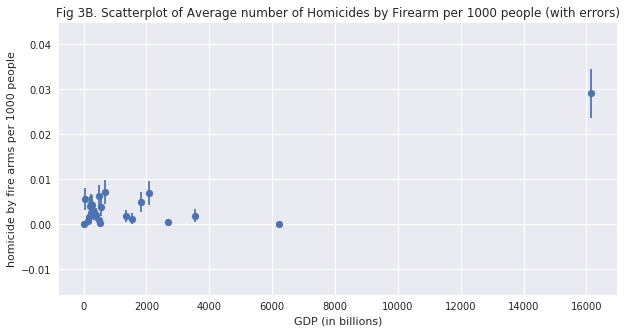

Number of homicides by firearm per 1000 people vs GDP, errors represent Poisson statistics.
Outliers:The datapoint to the right of the plot is the USA


In [63]:
#plot against the country GDP, with statistical errors.
#plotting with errorbars - scatterplot

fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_fin.gdp / 1e9, df_fin['Number of homicides by firearm'] / df_fin['pop'] * 1000)
ax.errorbar(df_fin.gdp / 1e9, df_fin['Number of homicides by firearm'] / df_fin['pop'] * 1000, 
            yerr = np.sqrt(df_fin['Number of homicides by firearm'] / df_fin['pop'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("homicide by fire arms per 1000 people")
ax.set_ylim()
ax.set_title("Fig 3C. Scatterplot of Average number of Homicides by Firearm per 1000 people (with errors)")
pl.show()

print ("Number of homicides by firearm per 1000 people vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "Outliers:The datapoint to the right of the plot is the USA")

Note that although the Number of homicides by firearm is close to zero, if we scale to 1000 people, there is a critical difference and USA is seen as an outlier having almost triple number of homicides per 1000 people than the majority of other countries

## 4. plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color
with and without errorbars


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


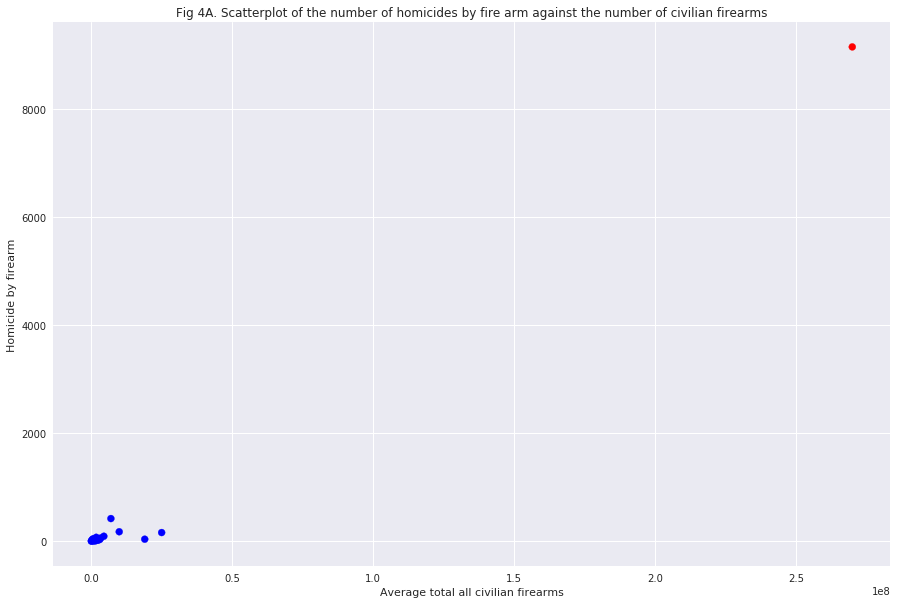

Number of homicides by firearm vs Average total all civilian firearms, errors represent Poisson statistics.
Outliers:The datapoint to the top right of the plot is the USA


In [67]:
#plotting without errors 

fig = pl.figure(figsize=(15,10)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_fin['Average total all civilian firearms'],
                     df_fin['Number of homicides by firearm'],
                    color = (df_fin['Country'] == 'United States').map({0:'b', 1:'r'}))
ax.set_xlabel("Average total all civilian firearms")
ax.set_ylabel("Homicide by firearm")
ax.set_ylim()
ax.set_title("Fig 4A. Scatterplot of the number of homicides by fire arm against the number of civilian firearms")

pl.show()
print ("Number of homicides by firearm vs Average total all civilian firearms, " + 
       "errors represent Poisson statistics.\n" + 
       "Outliers:The datapoint to the top right of the plot is the USA")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


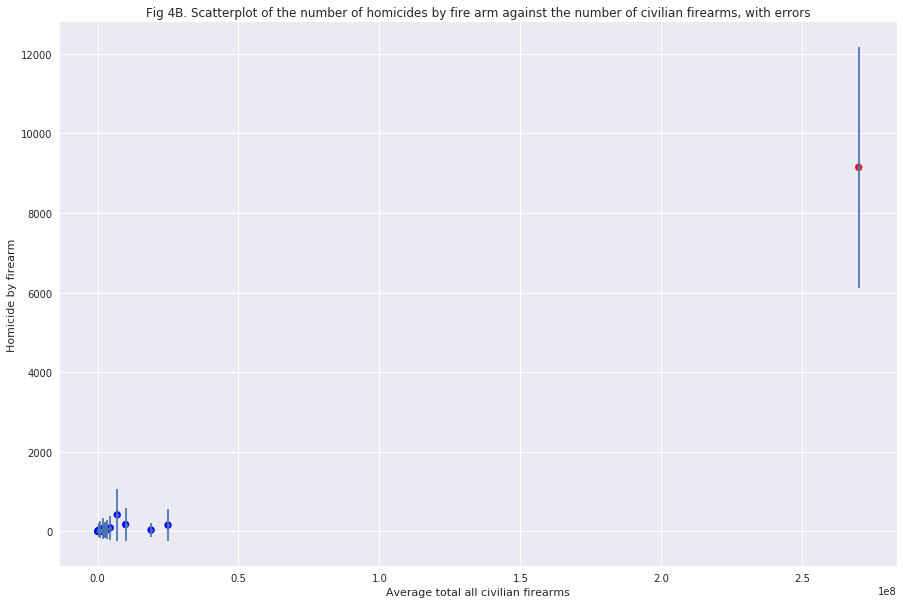

In [68]:
#plotting with errors 
#adjusting for better visual represenation

fig = pl.figure(figsize=(15,10)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_fin['Average total all civilian firearms'],
                     df_fin['Number of homicides by firearm'],
                    color = (df_fin['Country'] == 'United States').map({0:'b', 1:'r'}))

ax.errorbar(df_fin['Average total all civilian firearms'], df_fin['Number of homicides by firearm'], 
            yerr = np.sqrt(df_fin['Number of homicides by firearm']*1000), fmt = '.')

ax.set_xlabel("Average total all civilian firearms")
ax.set_ylabel("Homicide by firearm")
ax.set_ylim()
ax.set_title("Fig 4B. Scatterplot of the number of homicides by fire arm against the number of civilian firearms, with errors")

pl.show()

Again, USA is an outlier and marked red. It again has the highest average total all civilian firearms and the highest number of homicides by firearms with maximum error.  

## 5. plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color
with and without errorbars


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


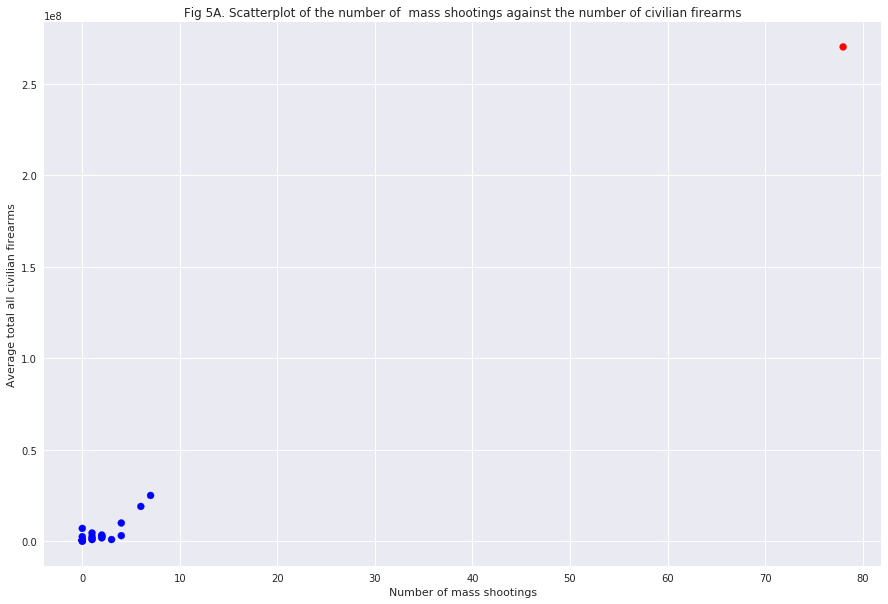

In [70]:
#plotting without errors 

fig = pl.figure(figsize=(15,10)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_fin['Number of mass shootings'],
                     df_fin['Average total all civilian firearms'],
                    color = (df_fin['Country'] == 'United States').map({0:'b', 1:'r'}))
ax.set_xlabel("Number of mass shootings")
ax.set_ylabel("Average total all civilian firearms")
ax.set_ylim()
ax.set_title("Fig 5A. Scatterplot of the number of  mass shootings against the number of civilian firearms")

pl.show()


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


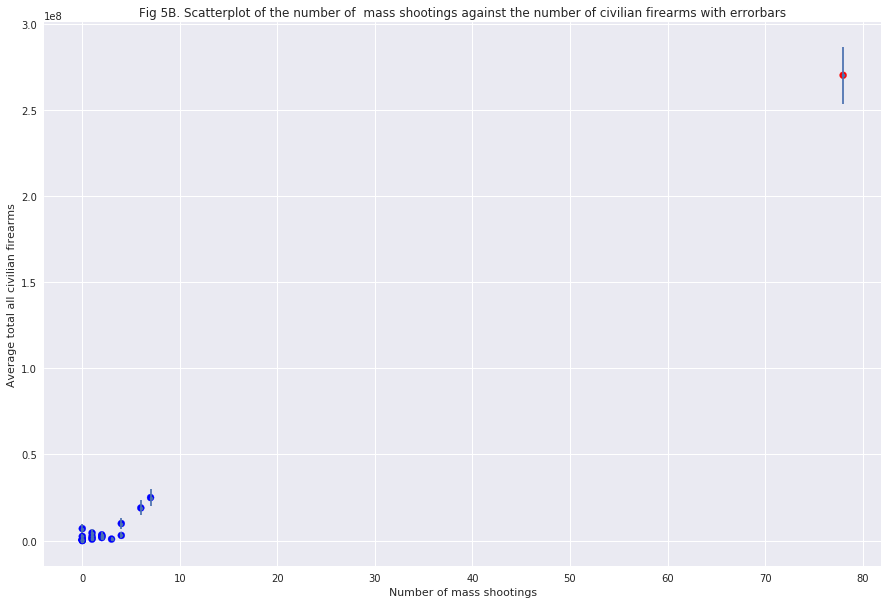

In [71]:
#plotting with errorbars 

fig = pl.figure(figsize=(15,10)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_fin['Number of mass shootings'],
                     df_fin['Average total all civilian firearms'],
                    color = (df_fin['Country'] == 'United States').map({0:'b', 1:'r'}))

ax.errorbar(df_fin['Number of mass shootings'], df_fin['Average total all civilian firearms'], 
            yerr = np.sqrt(df_fin['Average total all civilian firearms']*1e6), fmt = '.')
   
ax.set_xlabel("Number of mass shootings")
ax.set_ylabel("Average total all civilian firearms")
ax.set_ylim()
ax.set_title("Fig 5B. Scatterplot of the number of  mass shootings against the number of civilian firearms with errorbars")

pl.show()


Same as above, USA is an outlier and marked red. It has the highest number of  mass shootings and the highest  number of civilian firearms. The other countries have low values for these parameters. The errorbars are small, so the value spread is small too.  

# Modeling

## 6. fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person. 
Before you do it it is a good idea to make sure that both quantities are roughly of the same order of magnitude (unity). (You can simply divide by the order of magnitude of the mean of the sample to obtain this). Use

    - statsmodels OLS
    - statsmodels WLS
    - seaborn
    - choose one of
        -- creating a function that calculates the residuals and minimizing that function
        -- analytical solution http://mathworld.wolfram.com/LeastSquaresFitting.html
        -- numpy.polyfit() - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html
    

WLS: that is the weighted square fit. The statsmodel package WLS function allows you to take the uncertainties of each data point into account when you fit your model. It takes the parameter weights, which is the inverse of your errors:
weights = 1.0/df.yerror
Notice that 
    a - sqrt(0) = 0
    b - 1/0 = infinity
    c - you cannot have weight that are infinity in your fit. Please come up with a solution and justify it.


the latter three you can learn about in this example: https://github.com/fedhere/PUI2017_fb55/blob/master/Lab5_fb55/genderIncomeBias.ipynb
Since we did not discuss these, I will add some notes to the repo in the afternoon.

Use the seaborn python package built in regression function  to plot the regression confidence intervals. 

import seaborn  as sns
sns.regplot(x="x", y="y", data=df);




In [72]:
#calculating mean

#as per above, #the average number of civilian fire arms per person
#df_fin['firearms_pp'] = df_fin["Average total all civilian firearms"] / df_fin['pop'] 
df_fin['firearms_pp'].mean()

0.22601595245424749

In [73]:
#Number of mass shootings per person
#calculating mean

df_fin['shoot_pp'] = df_fin['Number of mass shootings']/df_fin['pop']
df_fin['shoot_pp'].mean()

1.2356888832925397e-07

In [74]:
#make sure that both quantities are roughly of the same order of magnitude (unity).
#lets change the magnitude 
# normalize 
df_fin['shoot_pp'] = df_fin['Number of mass shootings']/df_fin['pop']*1e6
df_fin['shoot_pp'].mean()

0.12356888832925393

In [75]:
#now the magnitude of two parameters are the same,
#firearm_pp is the Average total all civilian firearms per person
#shoot_pp is the Number of mass shootings per 1 million person

In [77]:
x = df_fin["firearms_pp"]
y = df_fin["shoot_pp"]

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


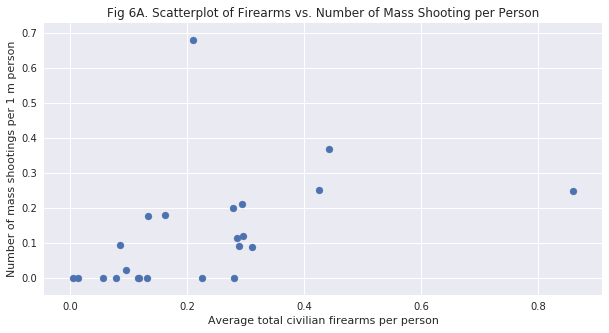

In [78]:
#plot - scatterplot

fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(x, y)
ax.set_xlabel("Average total civilian firearms per person")
ax.set_ylabel("Number of mass shootings per 1 m person")
ax.set_ylim()
ax.set_title("Fig 6A. Scatterplot of Firearms vs. Number of Mass Shooting per Person")

pl.show()

In [79]:
#regression statsmodels OLS 
lm = smf.ols(formula = 'shoot_pp ~ firearms_pp', data=df_fin).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               shoot_pp   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     4.981
Date:                Tue, 13 Nov 2018   Prob (F-statistic):             0.0367
Time:                        17:33:11   Log-Likelihood:                 12.284
No. Observations:                  23   AIC:                            -20.57
Df Residuals:                      21   BIC:                            -18.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept       0.0368      0.050      0.742      0.467        -0.066     0.140
firearms_pp     0.3837      0.172      2.232      0.037         0.026     0.741
==============================================================================
Omnibus:                       34.558   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.760
Skew:                           2.666   Prob(JB):                     5.32e-20
Kurtosis:                      11.012   Cond. No.                         5.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
#WLS and OLS fit
# code from: fedhere/UInotebooks/OLS/line_fit_and_residuals.ipynb

##this function will fit a line with statsmodels packages, 
##both with and without including the noise int he fir parameter (WLS and OLS respectively)
##also i can use the statsmodels.formula package passing it a formula, which i will need
##when i want to fit a curve, not a straight line, to the data
def myregression(x, y, method=None): 
    if method == None or method == 'O':
        rm = sm.OLS(y, x)
    elif method == 'W':
        rm = sm.WLS(y, x)
    else:
        print ("Problem in the way you called myregression")
        return -1
            
    reg = rm.fit()
    print ("linear regression slope {}".format(reg.summary()))
    return reg

def line(a, b, x):
    return a*x + b

linear regression slope                             OLS Regression Results                            
Dep. Variable:               shoot_pp   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     20.79
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           0.000154
Time:                        17:33:35   Log-Likelihood:                 11.986
No. Observations:                  23   AIC:                            -21.97
Df Residuals:                      22   BIC:                            -20.84
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
firearms_pp     0.4835    

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


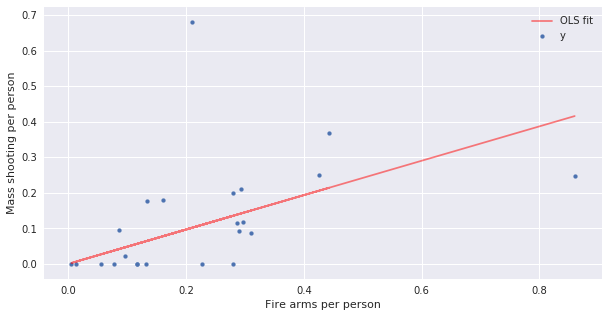

In [81]:
#OLS fit
rnew = myregression(x, y)
#rwnew = myregression(x, y, method='W')

fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

ax.scatter(x, y, label = "y", s = 15)
ax.set_xlabel('Fire arms per person')
ax.set_ylabel('Mass shooting per person')
ax.plot(x, rnew.predict(x), label = 'OLS fit', color = 'r', alpha=0.5)
ax.legend()

linear regression slope                             OLS Regression Results                            
Dep. Variable:               shoot_pp   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     20.79
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           0.000154
Time:                        17:33:48   Log-Likelihood:                 11.986
No. Observations:                  23   AIC:                            -21.97
Df Residuals:                      22   BIC:                            -20.84
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
firearms_pp     0.4835    

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


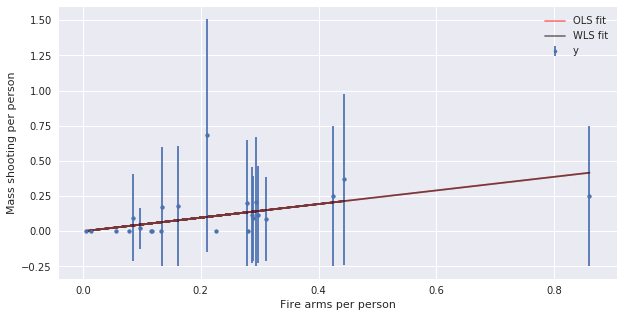

In [82]:
#OLS and WLS fit

rnew = myregression(x, y)
rwnew = myregression(x, y, method='W')

fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

ax.scatter(x, y, label=None, s = 15)
ax.set_xlabel('Fire arms per person')
ax.set_ylabel('Mass shooting per person')
ax.plot(x, rnew.predict(x), label = 'OLS fit', color = 'r', alpha=0.5)
ax.plot(x, rwnew.predict(x), label = 'WLS fit', color = 'black', alpha=0.5)
ax.errorbar(x, y, 
            yerr = np.sqrt(y), fmt = '.', label = 'y')
ax.legend()

## Outlier removal:
The concept of outlier is actually rather sophisticated: a point can be an outlier in a context but not in another. If you want to remove outliers and try different fits, here is some info on how to remove data efficiently from a dataset 
    https://gist.github.com/fedhere/89db40a3c9a28335bf5a35d52a52c595

## Extra credit: calculate the confidence interval by hand and also plot them 
you can use pylab.fill_between(x, yfit - ci, yfit + ci, alpha=0.5)

**Confidence intervals: **
there are three type of intervals in a linear regression, plot any one of them all three if you want - how do they compare to the seaborn plot?:

1) Confidence intervals for the parameters slope and intercept

2) Confidence interval for the average y value

3) Prediction interval for a single y value

1) __confidence interval of the  model parameters slope and intercept:__
define sigma as the sum of the residuals over the square root of number n of observations. 

sigma: σ̂ =sqrt(Sum((Yoberved_i−Ypredicted_i)^2)/n)

where the sum is over all observations

Define t_alpha/2,n-2 the t statistics at (1-alpha/2) for a t distribution with n-2 degrees of freedom (you can calculate it with scipy
tp = sp.stats.t.ppf(0.975, n-2)



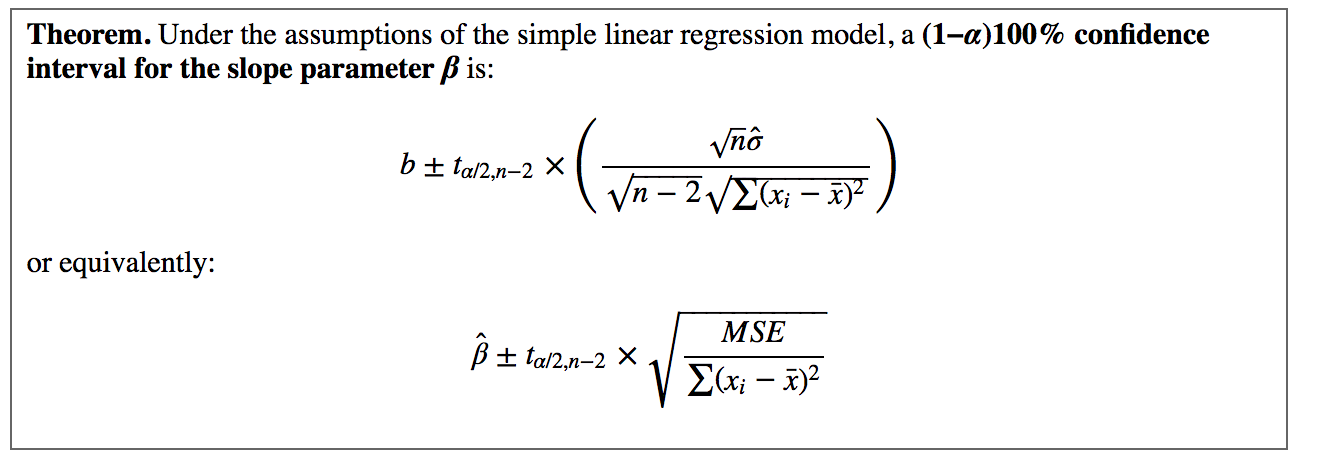

In [29]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression.png")

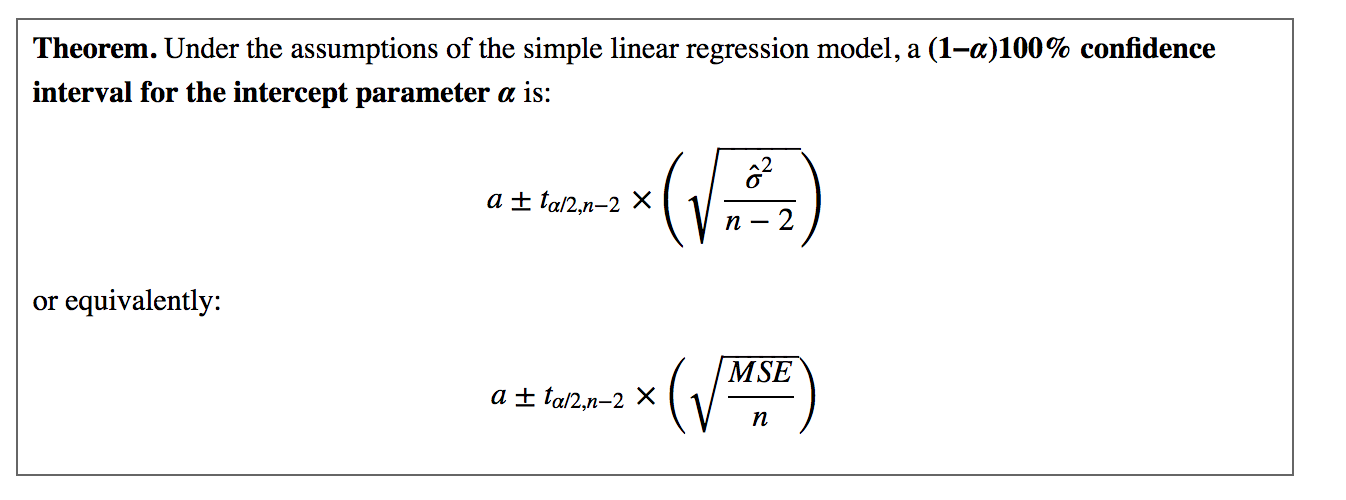

In [30]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression2.png")

[proof](https://onlinecourses.science.psu.edu/stat414/node/280)

2) **A confidence interval for E(y | x) , the expected (average) value of y for a given x_**

define s: residual standard error sy = sqrt(Sum((y_observed-y_predicted)^2)/(n-2))

(note: n-2 is the degrees of freedom of the problem: observations - number of parameters - 1)

the confidence interval for a given y(x*) is: 

y_predicted(x*) +/- t_(alpha/2)(n-2) * sy * sqrt( 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

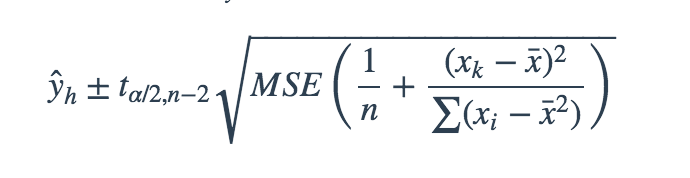

In [33]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciY.png")

3) **Confidence intervals for average y (predicted) values**

y_predicted(x*) +/- t_(n-2) * sy * sqrt( 1 + 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

very similar, but note the +1 in the square root

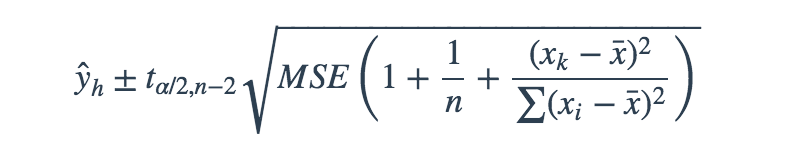

In [32]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciYaverage.png")

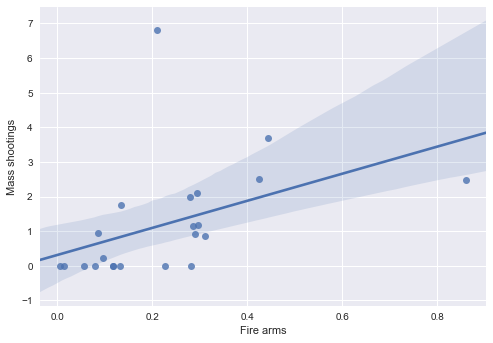

In [66]:
pl.figure()
import seaborn  as sns
sns.regplot(x="x", y="y", data=df_);

pl.ylabel("Mass shootings")
pl.xlabel("Fire arms");

## Use the stsatsmodels.gaphics package to plot the influence plot. 
Read the package documentation to learn how to read this plot and extract the countries with the highest influence

This is the topic of this week's assigned reading, so make sure you do the reading before you do this step. It will help you interpret the plot.

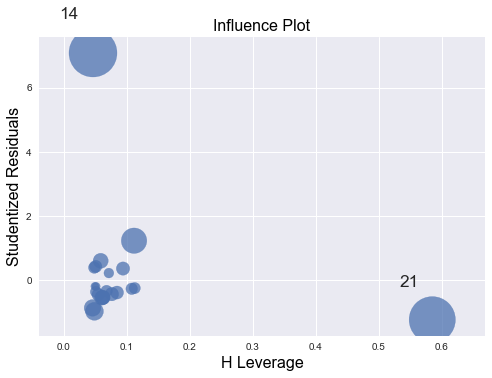

In [362]:
sm.graphics.influence_plot(modelOLS, alpha  = 0.05, criterion="cooks");

## Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences

## Discuss your findings